# Photoface Data Explorer

### The purpose of this notebook is to explore the data of the photoface database. Here we process the database structure to extract its meta content and visualise the spread of the data

1) First, lets traverse the directory structure of the database and extract all of its meta data

In [ ]:
import os

rootDir = '/home/arthur/faceSample' # The directory of the photoface database
metaData = []


# Traverse the directory structure of the photo face database to get the meta data for each session
for iDir, subjectDirs, files in os.walk(rootDir): # Each subject
    for subjectDir in subjectDirs:
        subjectPath = os.path.join(rootDir, subjectDir)
        for jDir, sessionDirs, subjectFiles in os.walk(subjectPath): # Each session
            for sessionDir in sessionDirs:
                sessionPath = os.path.join(subjectPath, sessionDir)
                metaFilePath = sessionPath + '/metadataII.txt'
                if os.path.isfile(metaFilePath):
                    sessionMeta = open(metaFilePath).read().split(',') # Extract the meta data as csv values into a list
                    sessionMeta = list(map(lambda s: s.strip(), sessionMeta)) # Remove white spaces
                    metaData.append(sessionMeta[:7]) # Take 7 elements as the last one is \n

print(metaData) # Print the meta data values to see their structure
%store metaData

[['male', 'no', 'none', '1', 'ok', '', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '', 'positive'], ['male', 'no', 'none', '1', 'ok', '', 'blankstare'], ['male', 'no', 'both', '1', 'ok', '', 'blankstare'], ['male', 'no', 'both', '1', 'ok', '', 'emoOther'], ['male', 'no', 'moustache', '1', 'ok', '', 'positive'], ['male', 'no', 'stubble', '1', 'blur', '', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '', 'positive'], ['male', 'no', 'none', '1', 'ok', '-other', 'blankstare'], ['male', 'no', 'none', '1', 'ok', '-other', 'blankstare'], ['male', 'no', 'stubble', '1', 'ok', '', 'positive'], ['male', 'no', 'stubble', '1', 'ok', '', 'positive'], ['male', 'no', 'both', '1', 'ok', '', 'blankstare'], ['male', 'no', 'both', '1', 'ok', '', 'blankstare'], ['male', 'no', 'stubble', '1'

2) Now that we have a list of all the session's meta values, lets aggregate the values to totals

In [4]:
def generateEmptyTotals():
    gender = {'male': 0, 'female': 0}
    spectacles = {'no': 0, 'yes': 0}
    facialHair = {'none': 0, 'beard': 0, 'moustache': 0, 'both': 0, 'stubble': 0}
    pose = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0}
    quality = {'ok': 0, 'blur': 0, 'dark': 0}
    occlusion = {'Mobile Phone': 0, 'hand': 0, 'hair': 0, '-other': 0, '': 0}
    emotion = {'blankstare': 0, 'positive': 0, 'negative': 0, '-other': 0, 'mouth ajar': 0, 'eyes closed': 0, 'emoOther': 0}
    return {
        'gender': gender,
        'spectacles': spectacles,
        'facialHair': facialHair,
        'pose': pose,
        'quality': quality,
        'occlusion': occlusion,
        'emotion': emotion
    }


%store -r metaData
totals = generateEmptyTotals()
for metaValues in metaData:
    totals['gender'][metaValues[0]] += 1
    totals['spectacles'][metaValues[1]] += 1
    totals['facialHair'][metaValues[2]] += 1
    totals['pose'][metaValues[3]] += 1
    totals['quality'][metaValues[4]] += 1
    totals['occlusion'][metaValues[5]] += 1
    totals['emotion'][metaValues[6]] += 1

print(totals)
%store totals
%store -d metaData

{'emotion': {'emoOther': 2, 'blankstare': 26, 'eyes closed': 0, 'mouth ajar': 0, 'negative': 0, '-other': 0, 'positive': 8}, 'spectacles': {'yes': 8, 'no': 28}, 'gender': {'male': 34, 'female': 2}, 'occlusion': {'hair': 0, '': 34, '-other': 2, 'Mobile Phone': 0, 'hand': 0}, 'pose': {'1': 34, '3': 0, '2': 2, '5': 0, '4': 0}, 'facialHair': {'stubble': 5, 'both': 6, 'none': 22, 'moustache': 3, 'beard': 0}, 'quality': {'dark': 0, 'ok': 32, 'blur': 4}}
Stored 'totals' (dict)


3) Now that we have the meta aggregates, lets visualize these so we can get a feel for the spread of data

3 a) Firstly, lets see the propotion of males to females

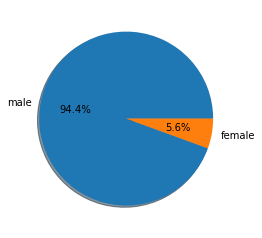

In [5]:
import plotHelper
plotHelper.plotPie(totals['gender'])

3 b) Now the distribution of subjects wearing glasses

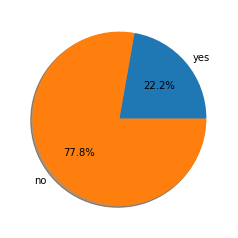

In [6]:
import plotHelper
plotHelper.plotPie(totals['spectacles'])

3 c) The distribution of subjects that had facial hair

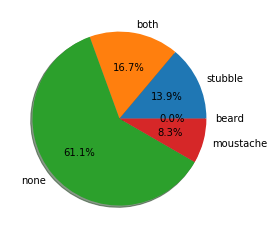

In [9]:
import plotHelper
plotHelper.plotPie(totals['facialHair'])

3 d) Pose variance

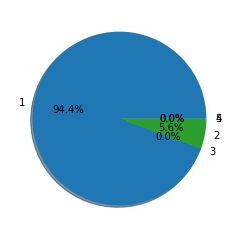

In [10]:
import plotHelper
plotHelper.plotPie(totals['pose'])

3 e) The range of quality

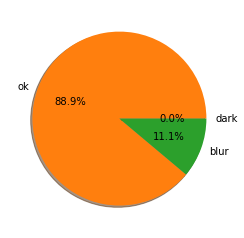

In [11]:
import plotHelper
plotHelper.plotPie(totals['quality'])

3 f) Any occlusions

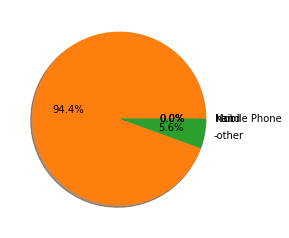

In [12]:
import plotHelper
plotHelper.plotPie(totals['occlusion'])

3 g) Distribution of subjects representing emotional states

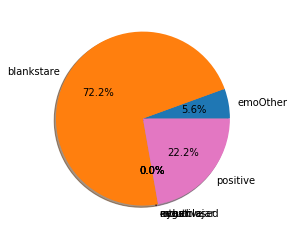

In [13]:
import plotHelper
plotHelper.plotPie(totals['emotion'])